# Spam detection using a multi-layer perceptron

#### **Import libraries**

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score,  f1_score, recall_score

#### **Data Loading**

In [126]:
df = pd.read_table('spam_emails',
                   sep='\t', 
                   header=None, 
                   names=['spam', 'email'])
df.shape

(5572, 2)

In [127]:
df['spam'] = df.spam.map({'ham':0, 'spam':1})
print(df.shape)
df.head() 

(5572, 2)


,spam,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   int64 
 1   email   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [129]:
X = df['email']

In [130]:
Y = df['spam']

#### **Data Cleaning**

In [131]:
df.isnull().sum()

spam     0
email    0
dtype: int64

In [132]:
df.drop_duplicates(inplace=True)

#### **Data Visualization**

In [133]:
Y.value_counts()

spam
0    4825
1     747
Name: count, dtype: int64

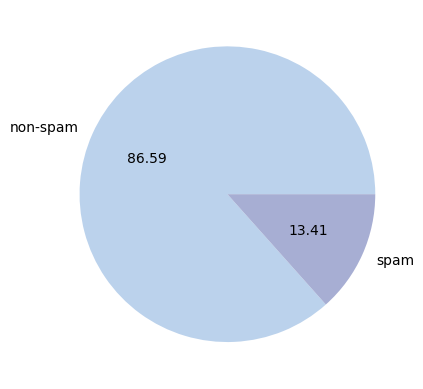

In [134]:
colors = ['#BBD2EC', '#A7AED3']
plt.pie(Y.value_counts(), labels=['non-spam','spam'], autopct="%0.2f", colors=colors)
plt.show()
#plt.savefig("spam.png")

C:\Users\OSD-student1\AppData\Local\Temp\ipykernel_22140\3274889776.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spam_words = wc.generate(df[Y == 1]['email'].str.cat(sep=" "))


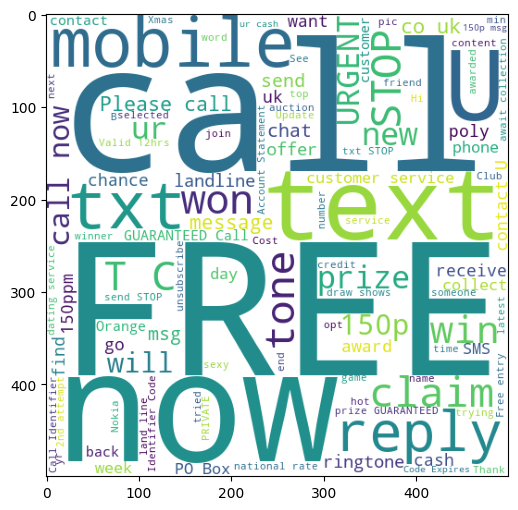

In [135]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_words = wc.generate(df[Y == 1]['email'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_words)
#plt.savefig("spam_words.png")

C:\Users\OSD-student1\AppData\Local\Temp\ipykernel_22140\1095029878.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_spam_words = wc.generate(df[Y == 0]['email'].str.cat(sep=" "))


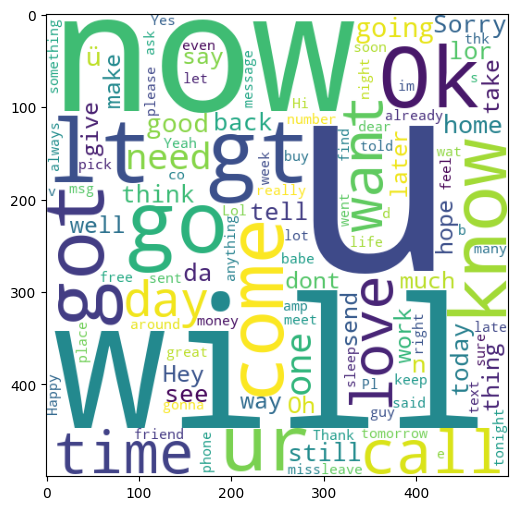

In [136]:
non_spam_words = wc.generate(df[Y == 0]['email'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(non_spam_words)
#plt.savefig("non_spam_words.png")

#### **TF-IDF matrix**

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_df=0.8) # ignore terms that appear in more than 80% of the documents
message = tf.fit_transform(X)

In [138]:
tf.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

#### **CountVectorizer**

In [139]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer()
# message = cv.fit_transform(X)
# cv.get_feature_names_out()

#### **Data Splitting** (test and train)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(message, Y, test_size=0.20, random_state=0)


#### **MLP**

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [159]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=100, kernel_regularizer= regularizers.L1(l1=1e-5), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [143]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               871400    
                                                                 
 dense_17 (Dense)            (None, 64)                6464      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 877929 (3.35 MB)
Trainable params: 877929 (3.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [144]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [145]:
history = model.fit(X_train.toarray(), y_train, batch_size=64, epochs=40, verbose=1, validation_split=0.2)

Epoch 1/40
56/56 [==============================] - 2s 24ms/step - loss: 0.4627 - accuracy: 0.8640 - val_loss: 0.2173 - val_accuracy: 0.8812
Epoch 2/40
56/56 [==============================] - 1s 19ms/step - loss: 0.1586 - accuracy: 0.9619 - val_loss: 0.1167 - val_accuracy: 0.9832
Epoch 3/40
56/56 [==============================] - 1s 20ms/step - loss: 0.0707 - accuracy: 0.9927 - val_loss: 0.0875 - val_accuracy: 0.9843
Epoch 4/40
56/56 [==============================] - 1s 22ms/step - loss: 0.0429 - accuracy: 0.9975 - val_loss: 0.0828 - val_accuracy: 0.9865
Epoch 5/40
56/56 [==============================] - 1s 21ms/step - loss: 0.0324 - accuracy: 0.9986 - val_loss: 0.0826 - val_accuracy: 0.9865
Epoch 6/40
56/56 [==============================] - 1s 19ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9865
Epoch 7/40
56/56 [==============================] - 1s 19ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9865
Epoch 8/40
56

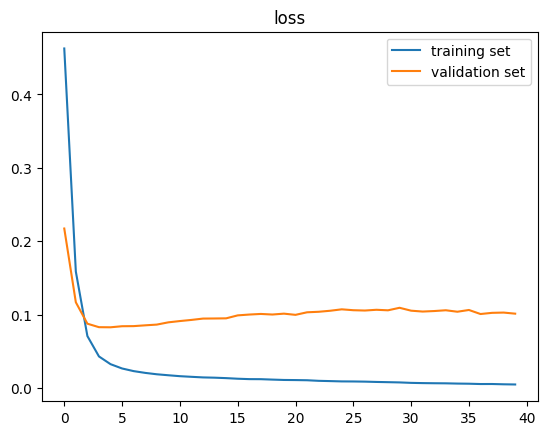

In [146]:
epochs = history.epoch
plt.plot(epochs, history.history['loss'], label="training set") # blue
plt.plot(epochs, history.history['val_loss'], label="validation set") #orange
plt.title('loss')
plt.legend()
plt.savefig("loss.png")

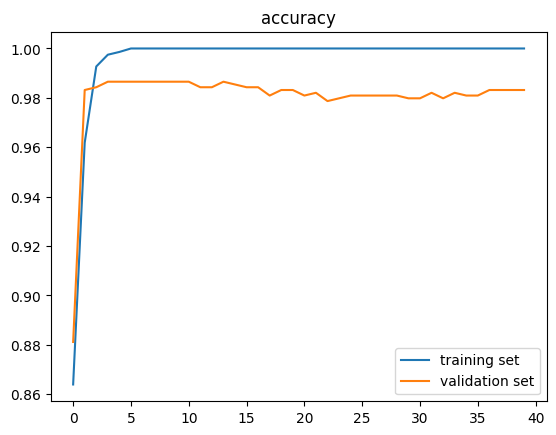

In [147]:
plt.plot(epochs, history.history['accuracy'], label="training set") #blue
plt.plot(epochs, history.history['val_accuracy'], label="validation set") #orange
plt.title('accuracy')
plt.savefig("accuracy.png")
plt.legend()

In [148]:
model.evaluate(X_test.toarray(), y_test, batch_size=64)

18/18 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9839


[0.07411565631628036, 0.9838564991950989]

In [149]:
y_pred = model.predict(X_test.toarray())

35/35 [==============================] - 0s 3ms/step


#### **Metrics**

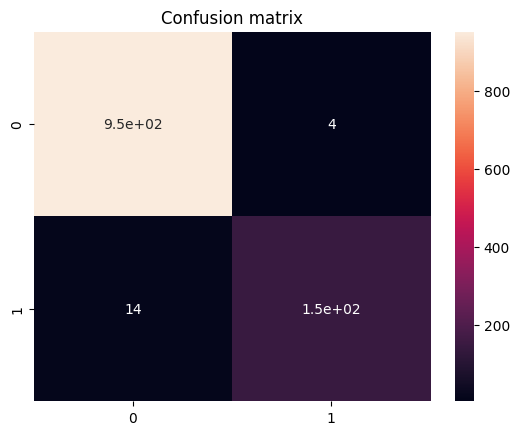

In [150]:
import seaborn as sns
y_pred_new = [int(not(i<0.5)) for i in y_pred]

cm=confusion_matrix(y_test, y_pred_new)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [151]:
print(classification_report(y_test, y_pred_new))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred_new)*100))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.97      0.91      0.94       160

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 98.39%


In [152]:
precision_score(y_test, y_pred_new)

0.9733333333333334

In [153]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred3 = mnb.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred3)*100))
print(classification_report(y_test, y_pred3))

Accuracy: 96.23%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       955
           1       1.00      0.74      0.85       160

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [165]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred4 = lr.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred4)*100))
print(classification_report(y_test, y_pred4))

Accuracy: 97.22%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       955
           1       0.98      0.82      0.89       160

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [155]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred5= rfc.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred5)*100))
print(classification_report(y_test, y_pred5))

Accuracy: 98.39%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.89      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [163]:
comparation = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred4)*100, f1_score(y_test,y_pred4,average='macro')*100, recall_score(y_test, y_pred4,average='micro')*100, precision_score(y_test, y_pred4,average='micro')*100],
                            'MLP':[accuracy_score(y_test,y_pred_new)*100, f1_score(y_test,y_pred_new,average='macro')*100, recall_score(y_test, y_pred_new,average='micro')*100, precision_score(y_test, y_pred_new,average='micro')*100],
                            'MultinomialNB':[accuracy_score(y_test,y_pred3)*100, f1_score(y_test,y_pred3,average='macro')*100, recall_score(y_test, y_pred3,average='micro')*100, precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred5)*100, f1_score(y_test,y_pred5,average='macro')*100, recall_score(y_test, y_pred5,average='micro')*100, precision_score(y_test, y_pred5,average='micro')*100],
                           

})

comparation.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
comparation.head()

,Logistic Regression,MLP,MultinomialNB,Random Forest
Accuracy,97.219731,98.385650,96.233184,98.385650
F1_score,93.909691,96.628024,91.370223,96.553063
Recall,97.219731,98.385650,96.233184,98.385650
Precision,97.219731,98.385650,96.233184,98.385650
